In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Sydney_Data.csv')

In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

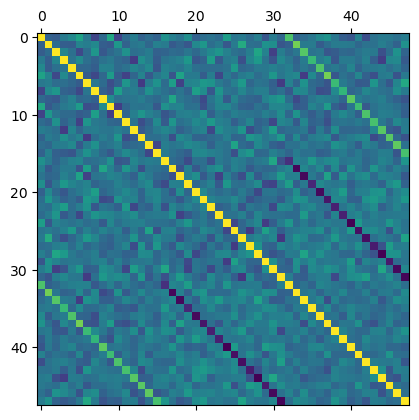

In [4]:
plt.matshow(X.corr())

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

,Coef
127.9439,-0.001009
264.9656,-0.002137
68.3481,-0.001500
521.757,-0.000225
443.6997,-0.001388
195.9648,0.000296
166.7701,-0.001048
504.285,0.000265
104.0226,-0.001927
205.2257,-0.001297


In [8]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.9999970888300233

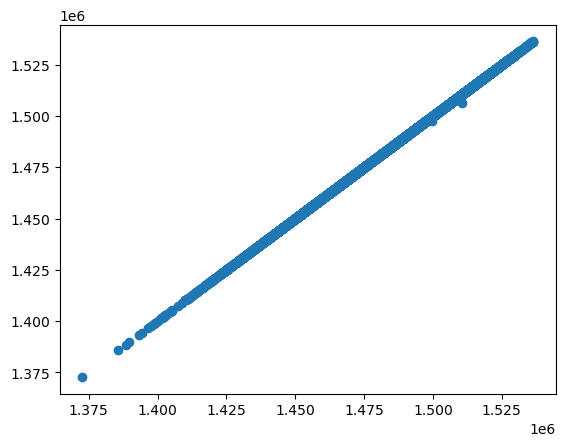

In [9]:
plt.scatter(y_test, predictions)

(array([1.4398e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -7.21853605,  413.1854792 ,  833.58949444, 1253.99350969,
        1674.39752493, 2094.80154018, 2515.20555543, 2935.60957067,
        3356.01358592, 3776.41760116, 4196.82161641]),
 <BarContainer object of 10 artists>)

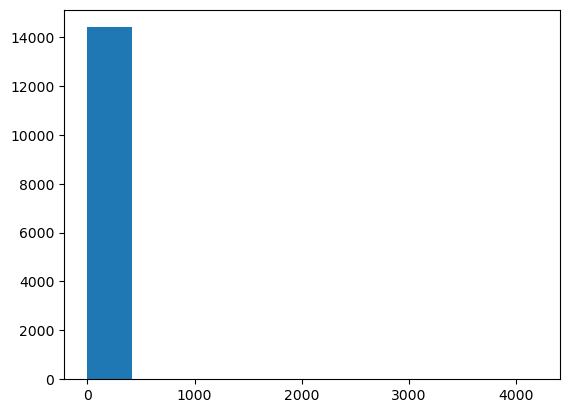

In [10]:
plt.hist(y_test - predictions)

In [11]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

1.2163750018194939

In [12]:
metrics.mean_squared_error(y_test, predictions)

1553.806667411618

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

39.418354448297535

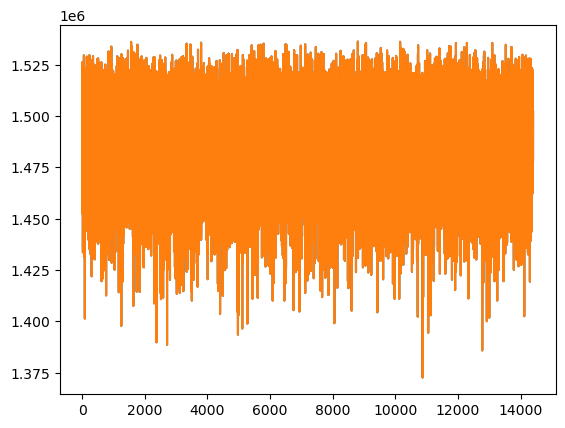

In [50]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.show()

# BOOST

In [14]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [15]:
score = xgbr.score(X, y)
score

0.9826622414189272

In [16]:
predictions_xgbr = xgbr.predict(X_test)

In [17]:
metrics.mean_absolute_error(y_test, predictions_xgbr)

2291.644257013889

In [18]:
mean_squared_error(y_test, predictions_xgbr)

9157557.854126971

In [19]:
np.sqrt(mean_squared_error(y_test, predictions_xgbr))

3026.1457093350564

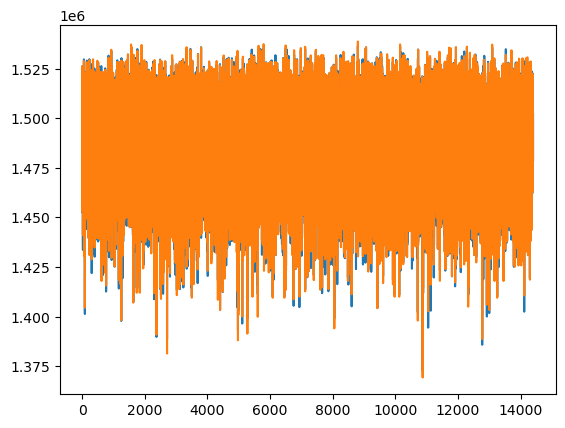

In [49]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions_xgbr, label="predicted")
plt.show()